In [1]:
#importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#for ignoring seaborn warnings
import warnings
warnings.filterwarnings("ignore")

# Reading data into python environment

In [4]:
iris = pd.read_excel(r"C:\Users\acer\Downloads\iris.xls")

In [5]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.shape

(150, 5)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#checking for missing values
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Data preprocessing

In [10]:
#checking for outliers

<AxesSubplot:>

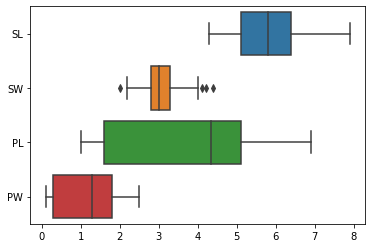

In [11]:
sns.boxplot(data=iris, orient='h')

Not much outliers present in the data.(also considering the amount of data no need to do outlier handling)

In [12]:
#Handling the missing values

In [13]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [14]:
#distribution of data of features which contains missing values

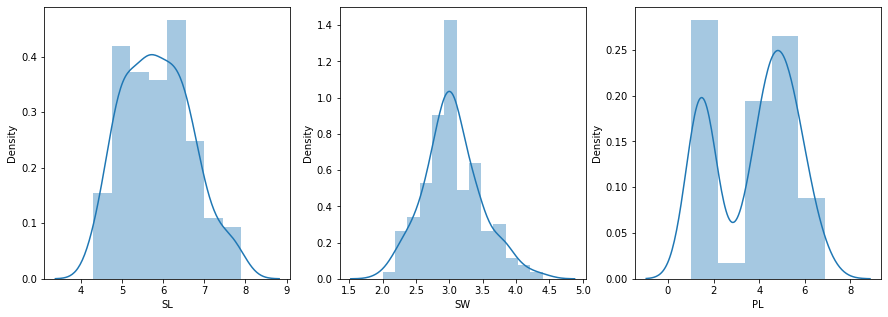

In [15]:
fig = plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(iris['SL'])
plt.subplot(1,3,2)
sns.distplot(iris['SW'])
plt.subplot(1,3,3)
sns.distplot(iris['PL'])
plt.show()

since there is no outliers and the data is normally distributed ,we can fill missing values with mean value.

In [16]:
missing_cols = ['SL', 'SW', 'PL']
for i in missing_cols:
    iris[i].fillna(iris[i].mean(), inplace=True)

In [17]:
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot:xlabel='Classification', ylabel='count'>

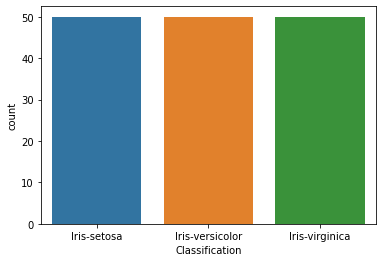

In [18]:
sns.countplot(iris['Classification'])

In [19]:
#encoding the target variable

In [20]:
iris['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Classification'] = le.fit_transform(iris['Classification'])

In [22]:
iris['Classification'].unique()

array([0, 1, 2])

Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2

In [23]:
#splitting data into independent and dependent features (X,y)

In [24]:
X = iris.drop('Classification', axis=1)
y = iris['Classification']

In [25]:
#splitting data for model training and testing

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model building

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



KNN Model

Text(0, 0.5, 'Testing Accuracy')

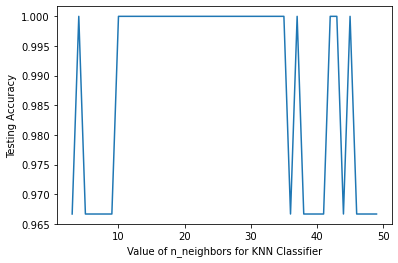

In [28]:
from sklearn.neighbors import KNeighborsClassifier
acc_lst = []
for i in range(3,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_lst.append(accuracy_score(y_test, y_pred))   
plt.plot(range(3,50), acc_lst)
plt.xlabel("Value of n_neighbors for KNN Classifier")
plt.ylabel("Testing Accuracy")

This plot will give us an idea of what value to take for n_neighbors, considering the size of the dataset, let n_neighbors=15

In [29]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Random Forest Classifier

In [31]:
#finding best value for n_estimators

Text(0, 0.5, 'Testing Accuracy')

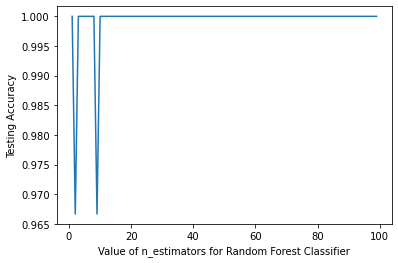

In [32]:
from sklearn.ensemble import RandomForestClassifier
scores =[]
for k in range(1, 100):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 100), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

Here we can take any values above 5, let n_estimators=100(default)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Support Vector Classifier

In [34]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



from this we can see all the model perform with 100% accuracy.But it is based on a particular test set.
So we cannot say it wil perform similarly on a new test set or new data.
In this case we can use cross validation technique(KFold cross validation)

# Model evaluation using cross validation

Here we use StratifiedKFold since it is a small dataset to get uniform split

In [35]:
#function for getting the score
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [36]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

In [37]:
score_lr = []
score_knn = []
score_dt = []
score_rf = []
score_svm = []
for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    score_lr.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    score_knn.append(get_score(KNeighborsClassifier(n_neighbors=15), X_train, X_test, y_train, y_test))
    score_dt.append(get_score(DecisionTreeClassifier(), X_train, X_test, y_train, y_test))
    score_rf.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))
    score_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))

In [38]:
#find the mean score of each model to evaluate

In [39]:
from statistics import mean

In [40]:
lr_mean_score = mean(score_lr)
knn_mean_score = mean(score_knn)
dt_mean_score = mean(score_dt)
rf_mean_score = mean(score_rf)
svm_mean_score = mean(score_svm)

In [41]:
print('Score for LogisticRgression model :', lr_mean_score.round(2))
print('Score for KNeighbors model :', knn_mean_score.round(2))
print('Score for DecisionTree model :', dt_mean_score.round(2))
print('Score for RandomForest model :', rf_mean_score.round(2))
print('Score for SVM model :', svm_mean_score.round(2))

Score for LogisticRgression model : 0.95
Score for KNeighbors model : 0.95
Score for DecisionTree model : 0.95
Score for RandomForest model : 0.97
Score for SVM model : 0.94


From the above score description it is clear that RandomForestClassifier performs better compared to others.
Also from cross validation result we can say that RandomForestClassifier works well with new test set, so we can say 
RandomForestClassifier generalize on new data better compared to others.(Also, there is no big difference in the accuracy score
between the models)

In [42]:
# loading library
import pickle

In [43]:
# create an iterator object with write permission - model.pkl
with open('iris_model.pkl', 'wb') as files:
    pickle.dump(rfc_model, files)